In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
# Download the dataset
! gdown 119CTzxqxrvbAuD5_ZqTRTOM9s4RHDx9x

Downloading...
From: https://drive.google.com/uc?id=119CTzxqxrvbAuD5_ZqTRTOM9s4RHDx9x
To: /content/walmart.csv
100% 23.0M/23.0M [00:00<00:00, 29.5MB/s]


In [3]:
# Read the dataset
df=pd.read_csv("walmart.csv")

In [4]:
# Shape of the dataset
df.shape

(550068, 10)

Data has 550068 rows and 10 columns

In [5]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [7]:
#Statistical Measurements
df.describe(include="all")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


In [8]:
df.groupby(["Gender"])["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


In [9]:
df.groupby(["Age"])["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,15102.0,8933.464640,5111.114046,12.0,5328.0,7986.0,11874.0,23955.0
18-25,99660.0,9169.663606,5034.321997,12.0,5415.0,8027.0,12028.0,23958.0
26-35,219587.0,9252.690633,5010.527303,12.0,5475.0,8030.0,12047.0,23961.0
36-45,110013.0,9331.350695,5022.923879,12.0,5876.0,8061.0,12107.0,23960.0
46-50,45701.0,9208.625697,4967.216367,12.0,5888.0,8036.0,11997.0,23960.0
51-55,38501.0,9534.808031,5087.368080,12.0,6017.0,8130.0,12462.0,23960.0
55+,21504.0,9336.280459,5011.493996,12.0,6018.0,8105.5,11932.0,23960.0


In [10]:
df.groupby(["City_Category"])["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
City_Category,,,,,,,,
A,147720.0,8911.939216,4892.115238,12.0,5403.0,7931.0,11786.0,23961.0
B,231173.0,9151.300563,4955.496566,12.0,5460.0,8005.0,11986.0,23960.0
C,171175.0,9719.920993,5189.465121,12.0,6031.5,8585.0,13197.0,23961.0


In [11]:
df.groupby(["Marital_Status"])["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0,324731.0,9265.907619,5027.347859,12.0,5605.0,8044.0,12061.0,23961.0
1,225337.0,9261.174574,5016.897378,12.0,5843.0,8051.0,12042.0,23961.0


Here we are comparing mean purchases made by customer accoring to different aspects like gender, age, city, and marital status. We conclude:

*   Customers with age group of 26-35 have made more purchases than others. However, the purchase amount mean is higher for 51-55 age group.
*   Customers from city category 'C' have higher mean purchase value. Customers who are sinlge have higer purchase values than the married ones.

In [12]:
# Checking duplicate values
df.duplicated().sum()

0

There are no null valuesinthe dataset

<Axes: >

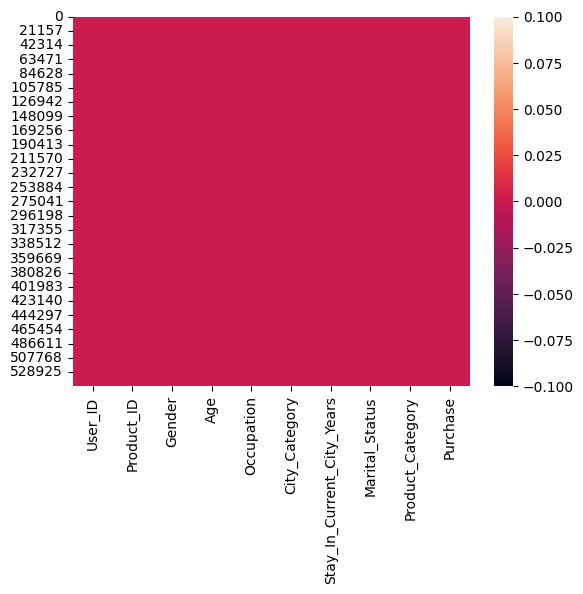

In [13]:
# Heatmap for null values
sns.heatmap(df.isnull())

In [14]:
# No. of males and females in dataset
round(df["Gender"].value_counts(normalize=True)*100,2)

M    75.31
F    24.69
Name: Gender, dtype: float64

The sample has 75% of male customer's data and 25% of female customers data

In [15]:
# Distribution of users on on the basis of gender and age group
df.groupby(["Age","Gender"])[["Age","Purchase"]].aggregate({"Age":'count',"Purchase":'sum'})

Age    Purchase
Age   Gender                    
0-17  F         5083    42385978
      M        10019    92527205
18-25 F        24628   205475842
      M        75032   708372833
26-35 F        50752   442976233
      M       168835  1588794345
36-45 F        27170   243438963
      M        82843   783130921
46-50 F        13199   116706864
      M        32502   304136539
51-55 F         9894    89465997
      M        28607   277633647
55+   F         5083    45782765
      M        16421   154984610

Male and females with age group of 26-35 have mademost number of purchases than the other age groups.

In [16]:
# Distribution of users on on the basis of gender and city category
df.groupby(["City_Category","Gender"])[["City_Category","Purchase"]].aggregate({"City_Category":'count',"Purchase":'sum'})

City_Category    Purchase
City_Category Gender                           
A             F               35704   306329915
              M              112016  1010141746
B             F               57796   493617008
              M              173377  1621916597
C             F               42309   386285719
              M              128866  1277521757

Males and females from city category 'B' made most of the purchases.

In [17]:
# Customers and their marital status
df.groupby(["Marital_Status","Gender"])[["Marital_Status","Purchase"]].aggregate({"Marital_Status":'count',"Purchase":'sum'})

Marital_Status    Purchase
Marital_Status Gender                            
0              F                78821   684154127
               M               245910  2324773320
1              F                56988   502078515
               M               168349  1584806780

Single customers have made most of the purchases

In [18]:
# Product categories made by men
df[df["Gender"]=="M"]["Product_Category"].value_counts().head()

1     115547
5     108972
8      80367
11     19548
2      18206
Name: Product_Category, dtype: int64

Top 5 product categories prefered by male customers are 1,5,8,11,2

In [19]:
# Product categories made by women
df[df["Gender"]=="F"]["Product_Category"].value_counts().reset_index().rename(columns={"index":"Product_Category","Product_Category":"Count"}).head()

,Product_Category,Count
0,5,41961
1,8,33558
2,1,24831
3,3,6006
4,2,5658


Top 5 product categories prefered by female customers are 5,8,1,3,2

In [20]:
# Product categories different age groups are buying
df1=df.groupby(["Age","Product_Category"])[["Product_Category"]].count().rename(columns={"Product_Category":"Count"}).sort_values(by=["Age","Count"],ascending=False).reset_index()
df1.iloc[0::20]

,Age,Product_Category,Count
0,55+,8,6208
20,51-55,5,9893
40,46-50,5,11971
60,36-45,5,29377
80,26-35,5,61473
100,18-25,5,28522
120,0-17,5,4330


Most of the agr group people prefer product category 5 except those who are 55+ of age

In [21]:
# Correlation between different data points
df.corr()

<ipython-input-21-102b42ed35d6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,User_ID,Occupation,Marital_Status,Product_Category,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,-0.000463
Product_Category,0.003825,-0.007618,0.019888,1.000000,-0.343703
Purchase,0.004716,0.020833,-0.000463,-0.343703,1.000000


<ipython-input-22-9aecf0a448d5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

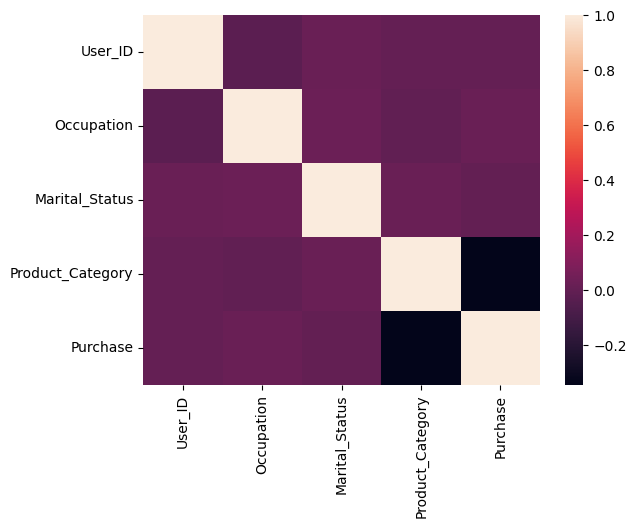

In [22]:
# Graphical representation of correlation
sns.heatmap(df.corr())

Here we can infer that all the attributes are very weakly correlated with each other.

Graphical Representation

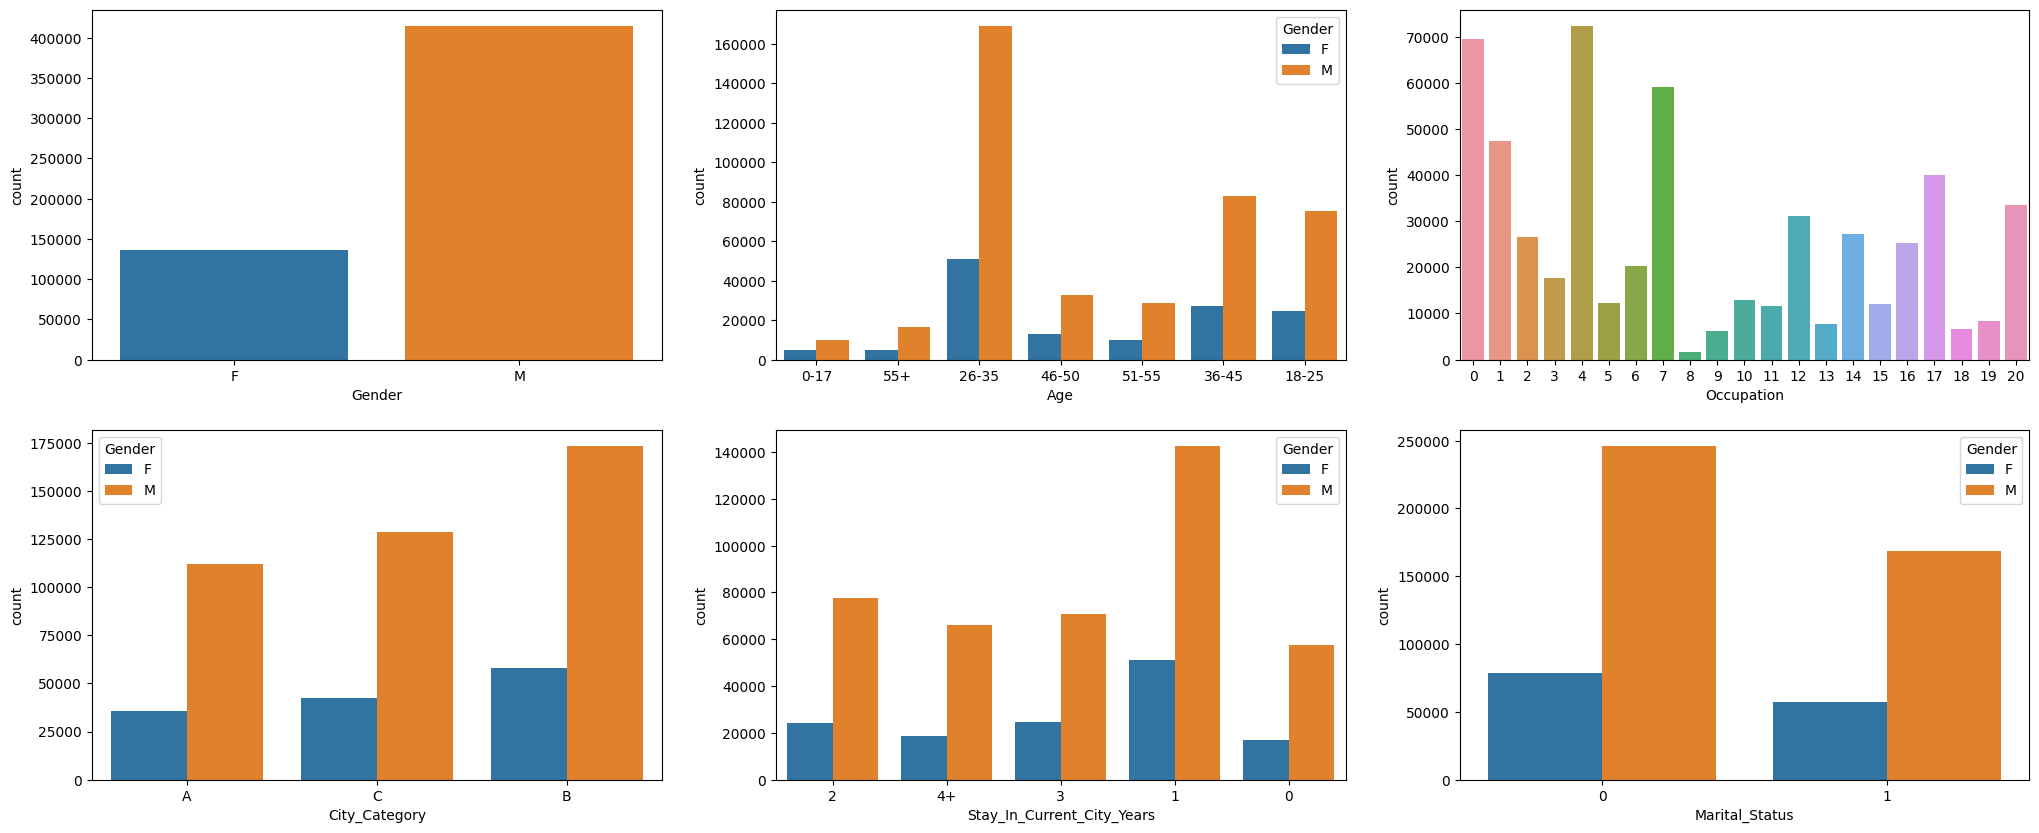

In [23]:
#Count for various attributes
plt.figure(figsize=(25,10))
plt.subplot(2,3,1)
sns.countplot(df,x="Gender")

plt.subplot(2,3,2)
sns.countplot(df,x="Age",hue="Gender")

plt.subplot(2,3,3)
sns.countplot(df,x="Occupation")

plt.subplot(2,3,4)
sns.countplot(df,x="City_Category",hue="Gender")

plt.subplot(2,3,5)
sns.countplot(df,x="Stay_In_Current_City_Years",hue="Gender")

plt.subplot(2,3,6)
sns.countplot(df,x="Marital_Status",hue="Gender")

plt.show()

Above is the graphical representation of the data and the infereances that we concluded.

<Axes: xlabel='City_Category', ylabel='Purchase'>

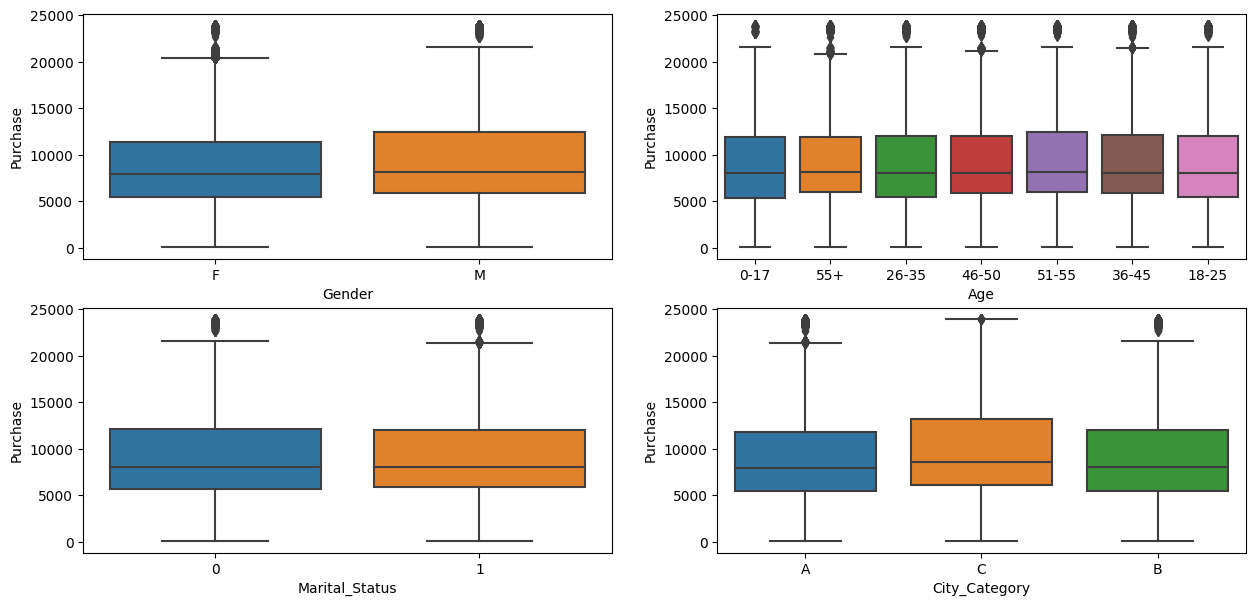

In [24]:
# Outlier detection
plt.figure(figsize=(15,7))
plt.subplot(2,2,1)
sns.boxplot(df,x="Gender",y="Purchase")

plt.subplot(2,2,2)
sns.boxplot(df,x="Age",y="Purchase")

plt.subplot(2,2,3)
sns.boxplot(df,x="Marital_Status",y="Purchase")

plt.subplot(2,2,4)
sns.boxplot(df,x="City_Category",y="Purchase")

The data has some outliers in purchases. however mean of each of the purchase in respect to the other attributes is very similar.

<Axes: xlabel='Purchase', ylabel='Density'>

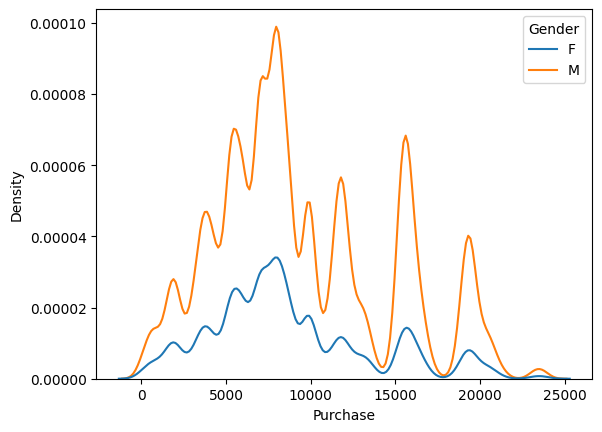

In [25]:
# Kdeplot for Purchase amount for men and women
sns.kdeplot(df,x="Purchase",hue="Gender")

In [26]:
# Pairplot
# sns.pairplot(df,hue="Gender")

CLT and Confidence Interval for Purchase

Assumptions:

We assume that the data provided  to us has been randomly sampled and they are independent of each other.



In [27]:
# Filtering data on the basis of gender
df_m=df[df["Gender"]=="M"]
df_f=df[df["Gender"]=="F"]

n_m=len(df_m["Purchase"])
n_f=len(df_f["Purchase"])

print("n for male",n_m)
print("n for female",n_f)

n for male 414259
n for female 135809


In [28]:
# Mean calculation
mean_m=round(df_m["Purchase"].mean(),2)
mean_f=round(df_f["Purchase"].mean(),2)

print("Sample mean of male:", mean_m)
print("Sample mean of female:", mean_f)

Sample mean of male: 9437.53
Sample mean of female: 8734.57


In [29]:
# Standared deviation
std_m=round(df_m["Purchase"].std(),2)
std_f=round(df_f["Purchase"].std(),2)

print("Sample std of male:",std_m)
print("Sample std of female:",std_f)


Sample std of male: 5092.19
Sample std of female: 4767.23


In [30]:
# Standard error
se_m=round(std_m/np.sqrt(n_m),2)
se_f=round(std_f/np.sqrt(n_f),2)

print("Sample standared error of male:",se_m)
print("Sample standared error of female:",se_f)

Sample standared error of male: 7.91
Sample standared error of female: 12.94


In [31]:
#95% Confidence Interval for male
x1= round(mean_m+(norm.ppf(0.05)*se_m),2)
x2= round(mean_m+(norm.ppf(0.95)*se_m),2)

print("95% CI range is", (x1,x2))

95% CI range is (9424.52, 9450.54)


In [32]:
#95% Confidence Interval for female
y1= round(mean_f+(norm.ppf(0.05)*se_f),2)
y2= round(mean_f+(norm.ppf(0.95)*se_f),2)

print("95% CI range is", (y1,y2))

95% CI range is (8713.29, 8755.85)


From the above we can infer that 95% CI range for purchase for female customers is (8713.29, 8755.85) and for male customers is (9424.52, 9450.54). CI for femaleis wider than the CI for male becuase of the sample size of both the segments(male and female). Larger sample sizes give more precise range than smaller sample sizes.

In [33]:
# Bootsrapping for re-sampling for male
male_purchase=df[df["Gender"]=="M"]["Purchase"]

In [34]:
sample1=np.random.choice(male_purchase,size=300)
print("Mean of sample1", round(np.mean(sample1),2))

sample2=np.random.choice(male_purchase,size=3000)
print("Mean of sample2", round(np.mean(sample2),2))

sample3=np.random.choice(male_purchase,size=30000)
print("Mean of sample3", round(np.mean(sample3),2))

Mean of sample1 9192.65
Mean of sample2 9401.96
Mean of sample3 9430.09


In [35]:
bootstrapped_means1=[]
for i in range(10000):
  rs=np.random.choice(male_purchase,size=300)
  rs_mean=int(np.mean(rs))
  bootstrapped_means1.append(rs_mean)

<Axes: ylabel='Count'>

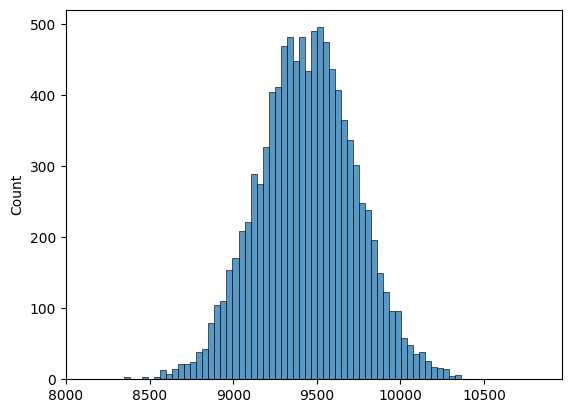

In [36]:
sns.histplot(x=bootstrapped_means1)

In [37]:
bootstrapped_means2=[]
for i in range(10000):
  rs2=np.random.choice(male_purchase,size=3000)
  rs_mean2=int(np.mean(rs2))
  bootstrapped_means2.append(rs_mean2)

<Axes: ylabel='Count'>

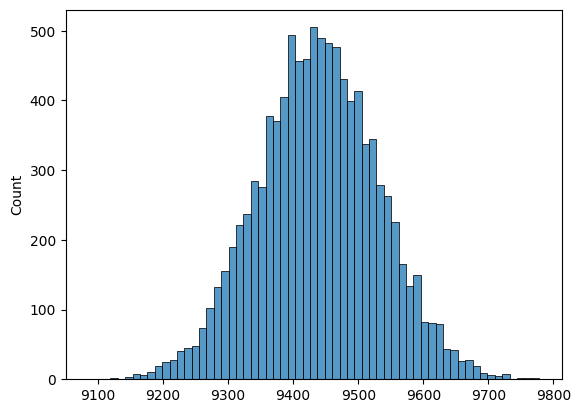

In [38]:
sns.histplot(x=bootstrapped_means2)

In [39]:
bootstrapped_means3=[]
for i in range(10000):
  rs3=np.random.choice(male_purchase,size=30000)
  rs_mean3=int(np.mean(rs3))
  bootstrapped_means3.append(rs_mean3)

<Axes: ylabel='Count'>

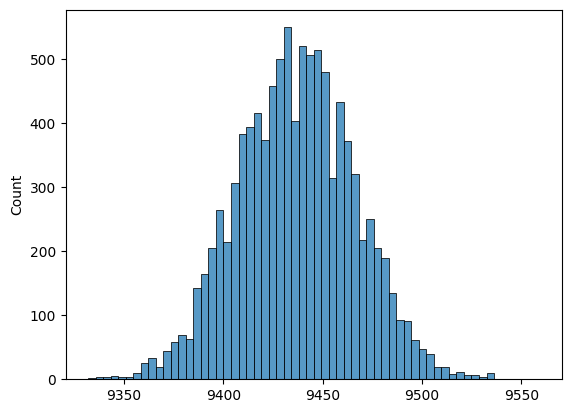

In [40]:
sns.histplot(x=bootstrapped_means3)

In [41]:
# When we consider 95% CI, our left and right bracket will be 2.5 and 97.5
# for bootstrapped_mean
left_mean1= np.percentile(bootstrapped_means1,2.5)
right_mean1= np.percentile(bootstrapped_means1,97.5)
print('95% CI for bootstarpped_means1 is', [left_mean1,right_mean1])

left_mean2= np.percentile(bootstrapped_means2,2.5)
right_mean2= np.percentile(bootstrapped_means2,97.5)
print('95% CI for bootstarpped_means2 is', [left_mean2,right_mean2])

left_mean3= np.percentile(bootstrapped_means3,2.5)
right_mean3= np.percentile(bootstrapped_means3,97.5)
print('95% CI for bootstarpped_means3 is', [left_mean3,right_mean3])

95% CI for bootstarpped_means1 is [8876.975, 10009.025]
95% CI for bootstarpped_means2 is [9258.0, 9621.025]
95% CI for bootstarpped_means3 is [9380.0, 9494.0]


Here we can see that, as we increase the sample size the CI range is narrowing.To be more precise, we can say that we have 95% of confidence that the mean purchase by male in the population data will be between [9379.0, 9495.0]

In [42]:
# Bootsrapping for re-sampling for females
female_purchase=df[df["Gender"]=="F"]["Purchase"]

sample11=np.random.choice(female_purchase,size=300)
print("Mean of sample1", round(np.mean(sample11),2))

sample22=np.random.choice(female_purchase,size=3000)
print("Mean of sample2", round(np.mean(sample22),2))

sample33=np.random.choice(female_purchase,size=30000)
print("Mean of sample3", round(np.mean(sample33),2))

Mean of sample1 8632.78
Mean of sample2 8806.53
Mean of sample3 8711.5


<Axes: ylabel='Count'>

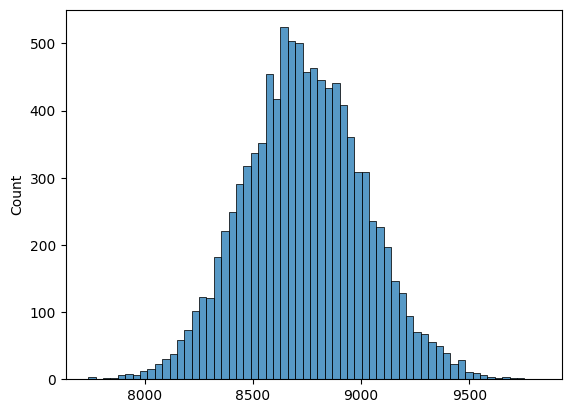

In [43]:
bootstrapped_means11=[]
for i in range(10000):
  rs11=np.random.choice(female_purchase,size=300)
  rs_mean11=int(np.mean(rs11))
  bootstrapped_means11.append(rs_mean11)

sns.histplot(x=bootstrapped_means11)

<Axes: ylabel='Count'>

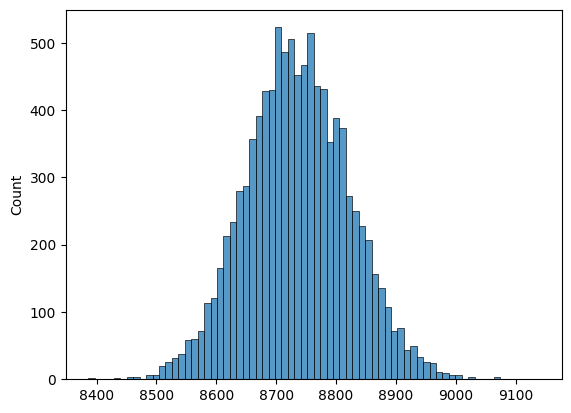

In [44]:
bootstrapped_means22=[]
for i in range(10000):
  rs22=np.random.choice(female_purchase,size=3000)
  rs_mean22=int(np.mean(rs22))
  bootstrapped_means22.append(rs_mean22)

sns.histplot(x=bootstrapped_means22)

<Axes: ylabel='Count'>

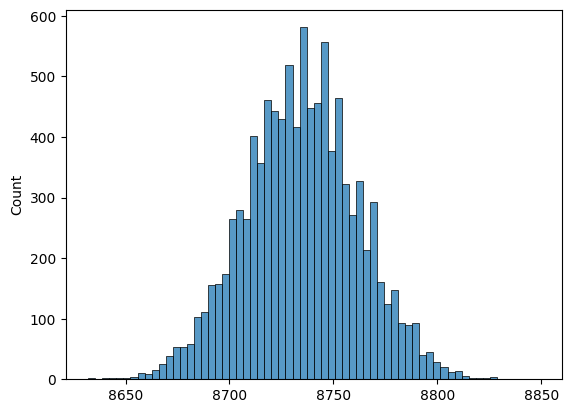

In [45]:
bootstrapped_means33=[]
for i in range(10000):
  rs33=np.random.choice(female_purchase,size=30000)
  rs_mean33=int(np.mean(rs33))
  bootstrapped_means33.append(rs_mean33)

sns.histplot(x=bootstrapped_means33)

In [46]:
# When we consider 95% CI, our left and right bracket will be 2.5 and 97.5
left_mean11= np.percentile(bootstrapped_means11,2.5)
right_mean11= np.percentile(bootstrapped_means11,97.5)
print('95% CI for bootstarpped_means11 is', [left_mean11,right_mean11])

left_mean22= np.percentile(bootstrapped_means22,2.5)
right_mean22= np.percentile(bootstrapped_means22,97.5)
print('95% CI for bootstarpped_means22 is', [left_mean22,right_mean22])

left_mean33= np.percentile(bootstrapped_means33,2.5)
right_mean33= np.percentile(bootstrapped_means33,97.5)
print('95% CI for bootstarpped_means33 is', [left_mean33,right_mean33])

95% CI for bootstarpped_means11 is [8205.0, 9303.0]
95% CI for bootstarpped_means22 is [8568.0, 8908.0]
95% CI for bootstarpped_means33 is [8681.0, 8788.0]


For female customers, we can see that, as we increase the sample size the CI range is narrowing as the standared error decreases. To be more precise, we can say that we have 95% of confidence that the mean purchase by male in the population data will be between [8680.0, 8789.0]

CLT and Confidence Interval for Marital Status
(Here we assume that '0' stands for singles and '1' stands for married)

In [47]:
# Filtering data on the basis of marital status
df_0=df[df["Marital_Status"]==0]
df_1=df[df["Marital_Status"]==1]

n_0=len(df_0["Purchase"])
n_1=len(df_1["Purchase"])

print("n for singles",n_0)
print("n for married",n_1)

n for singles 324731
n for married 225337


In [48]:
# Mean calculation
mean_0=round(df_0["Purchase"].mean(),2)
mean_1=round(df_1["Purchase"].mean(),2)

print("Sample mean of singles:", mean_0)
print("Sample mean of married:", mean_1)

Sample mean of singles: 9265.91
Sample mean of married: 9261.17


In [49]:
# Standared deviation
std_0=round(df_0["Purchase"].std(),2)
std_1=round(df_1["Purchase"].std(),2)

print("Sample std of singles:",std_0)
print("Sample std of married:",std_1)


Sample std of singles: 5027.35
Sample std of married: 5016.9


In [50]:
# Standard error
se_0=round(std_0/np.sqrt(n_0),2)
se_1=round(std_1/np.sqrt(n_1),2)

print("Sample standared error of singles:",se_0)
print("Sample standared error of married:",se_1)

Sample standared error of singles: 8.82
Sample standared error of married: 10.57


In [51]:
#95% Confidence Interval for singles
x_s1= round(mean_0+(norm.ppf(0.05)*se_0),2)
x_s2= round(mean_0+(norm.ppf(0.95)*se_0),2)

print("95% CI range is", (x_s1,x_s2))

95% CI range is (9251.4, 9280.42)


In [52]:
#95% Confidence Interval for married
y_m1= round(mean_1+(norm.ppf(0.05)*se_1),2)
y_m2= round(mean_1+(norm.ppf(0.95)*se_1),2)

print("95% CI range is", (y_m1,y_m2))

95% CI range is (9243.78, 9278.56)


In [53]:
# Bootsrapping for re-sampling for Singles
singles_purchase=df[df["Marital_Status"]==0]["Purchase"]

In [54]:
sample_singles1=np.random.choice(singles_purchase,size=300)
print("Mean of sample1", round(np.mean(sample_singles1),2))

sample_singles2=np.random.choice(singles_purchase,size=3000)
print("Mean of sample2", round(np.mean(sample_singles2),2))

sample_singles3=np.random.choice(singles_purchase,size=30000)
print("Mean of sample3", round(np.mean(sample_singles3),2))

Mean of sample1 8973.29
Mean of sample2 9330.64
Mean of sample3 9225.67


In [55]:
bootstrapped_means_singles1=[]
for i in range(10000):
  rs_singles=np.random.choice(singles_purchase,size=300)
  rs_singles_mean=int(np.mean(rs_singles))
  bootstrapped_means_singles1.append(rs_singles_mean)

<Axes: ylabel='Count'>

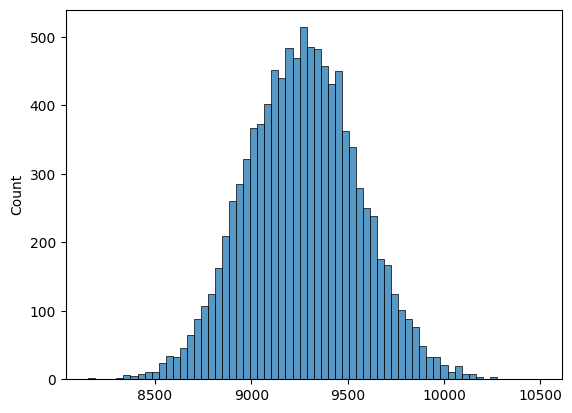

In [56]:
sns.histplot(x=bootstrapped_means_singles1)

In [57]:
bootstrapped_means_singles2=[]
for i in range(10000):
  rs_singles2=np.random.choice(singles_purchase,size=3000)
  rs_singles_mean2=int(np.mean(rs_singles2))
  bootstrapped_means_singles2.append(rs_singles_mean2)

<Axes: ylabel='Count'>

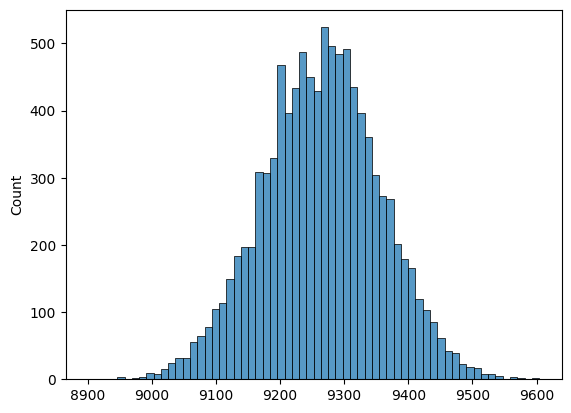

In [58]:
sns.histplot(x=bootstrapped_means_singles2)

In [59]:
bootstrapped_means_singles3=[]
for i in range(10000):
  rs_singles3=np.random.choice(singles_purchase,size=30000)
  rs_singles_mean3=int(np.mean(rs_singles3))
  bootstrapped_means_singles3.append(rs_singles_mean3)

<Axes: ylabel='Count'>

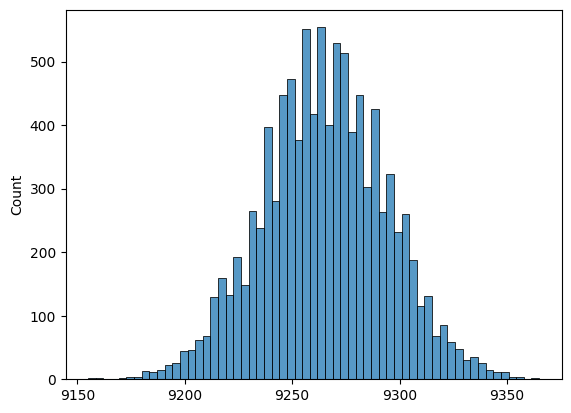

In [60]:
sns.histplot(x=bootstrapped_means_singles3)

In [61]:
# When we consider 95% CI, our left and right bracket will be 2.5 and 97.5
# for bootstrapped_mean
left_mean_singles1= np.percentile(bootstrapped_means_singles1,2.5)
right_mean_singles1= np.percentile(bootstrapped_means_singles1,97.5)
print('95% CI for bootstarpped_means_singles1 is', [left_mean_singles1,right_mean_singles1])

left_mean_singles2= np.percentile(bootstrapped_means_singles2,2.5)
right_mean_singles2= np.percentile(bootstrapped_means_singles2,97.5)
print('95% CI for bootstarpped_means_singles2 is', [left_mean_singles2,right_mean_singles2])

left_mean_singles3= np.percentile(bootstrapped_means_singles3,2.5)
right_mean_singles3= np.percentile(bootstrapped_means_singles3,97.5)
print('95% CI for bootstarpped_means_singles3 is', [left_mean_singles3,right_mean_singles3])

95% CI for bootstarpped_means_singles1 is [8705.0, 9841.0]
95% CI for bootstarpped_means_singles2 is [9082.0, 9443.0]
95% CI for bootstarpped_means_singles3 is [9208.0, 9322.0]


For single customers, we can see that, as we increase the sample size the CI range is narrowing as the standared error decreases. To be more precise, we can say that we have 95% of confidence that the mean purchase by singles in the population data will be between [9207.0, 9322.0]

In [62]:
# Bootsrapping for re-sampling for married
married_purchase=df[df["Marital_Status"]==1]["Purchase"]

sample_married1=np.random.choice(married_purchase,size=300)
print("Mean of sample1", round(np.mean(sample_married1),2))

sample_married2=np.random.choice(married_purchase,size=3000)
print("Mean of sample2", round(np.mean(sample_married2),2))

sample_married3=np.random.choice(married_purchase,size=30000)
print("Mean of sample3", round(np.mean(sample_married3),2))

Mean of sample1 9517.01
Mean of sample2 9179.75
Mean of sample3 9252.3


<Axes: ylabel='Count'>

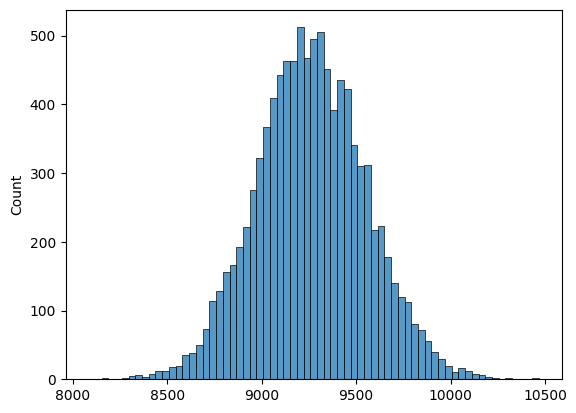

In [63]:
bootstrapped_means_married1=[]
for i in range(10000):
  rs_married1=np.random.choice(married_purchase,size=300)
  rs_married_mean1=int(np.mean(rs_married1))
  bootstrapped_means_married1.append(rs_married_mean1)

sns.histplot(x=bootstrapped_means_married1)

<Axes: ylabel='Count'>

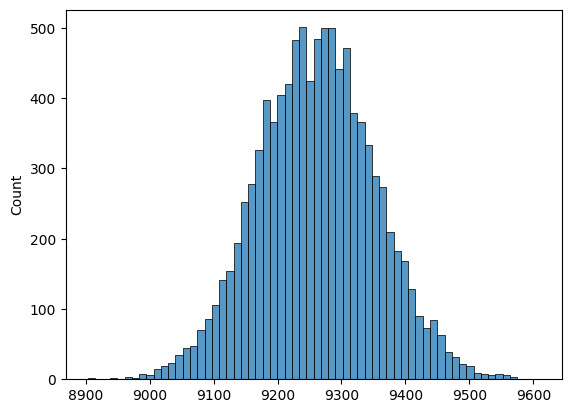

In [64]:
bootstrapped_means_married2=[]
for i in range(10000):
  rs_married2=np.random.choice(married_purchase,size=3000)
  rs_married_mean2=int(np.mean(rs_married2))
  bootstrapped_means_married2.append(rs_married_mean2)

sns.histplot(x=bootstrapped_means_married2)

<Axes: ylabel='Count'>

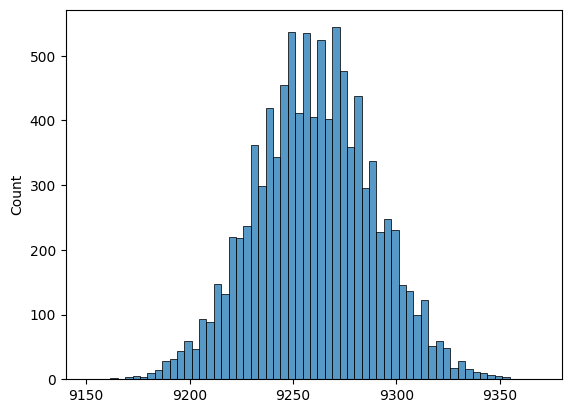

In [65]:
bootstrapped_means_married3=[]
for i in range(10000):
  rs_married3=np.random.choice(married_purchase,size=30000)
  rs_married_mean3=int(np.mean(rs_married3))
  bootstrapped_means_married3.append(rs_married_mean3)

sns.histplot(x=bootstrapped_means_married3)

In [66]:
# When we consider 95% CI, our left and right bracket will be 2.5 and 97.5
left_mean_married1= np.percentile(bootstrapped_means_married1,2.5)
right_mean_married1= np.percentile(bootstrapped_means_married1,97.5)
print('95% CI for bootstarpped_means_married1 is', [left_mean_married1,right_mean_married1])

left_mean_married2= np.percentile(bootstrapped_means_married2,2.5)
right_mean_married2= np.percentile(bootstrapped_means_married2,97.5)
print('95% CI for bootstarpped_means_married2 is', [left_mean_married2,right_mean_married2])

left_mean_married3= np.percentile(bootstrapped_means_married3,2.5)
right_mean_married3= np.percentile(bootstrapped_means_married3,97.5)
print('95% CI for bootstarpped_means_married3 is', [left_mean_married3,right_mean_married3])

95% CI for bootstarpped_means_married1 is [8707.0, 9843.025]
95% CI for bootstarpped_means_married2 is [9081.0, 9444.0]
95% CI for bootstarpped_means_married3 is [9204.975, 9316.0]


For married customers, we can see that, as we increase the sample size the CI range is narrowing as the standared error decreases. To be more precise, we can say that we have 95% of confidence that the mean purchase by married in the population data will be between [9204.0, 9317.0]

CLT and Confidence Interval for Age

In [67]:
df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [68]:
# Filtering data on the basis of Age group

kids= df.query('Age=="0-17" or Age=="18-25"')["Purchase"]
adults= df.query('Age=="26-35" or Age=="46-50" and Age=="36-45"')["Purchase"]
seniors= df.query('Age=="55+" or Age=="51-55"')["Purchase"]

n_kids=len(kids)
n_adults=len(adults)
n_seniors=len(seniors)

print("n for kids",n_kids)
print("n for adults",n_adults)
print("n for seniors",n_seniors)

n for kids 114762
n for adults 219587
n for seniors 60005


In [69]:
# Mean calculation
mean_kids=round(kids.mean(),2)
mean_adults=round(adults.mean(),2)
mean_seniors=round(seniors.mean(),2)

print("Sample mean of kids:", mean_kids)
print("Sample mean of adults:", mean_adults)
print("Sample mean of seniors:", mean_seniors)

Sample mean of kids: 9138.58
Sample mean of adults: 9252.69
Sample mean of seniors: 9463.66


In [70]:
# Standared deviation
std_kids=round(kids.std(),2)
std_adults=round(adults.std(),2)
std_seniors=round(seniors.std(),2)

print("Sample std of kids:",std_kids)
print("Sample std of adults:",std_adults)
print("Sample std of seniors:",std_seniors)

Sample std of kids: 5045.1
Sample std of adults: 5010.53
Sample std of seniors: 5061.16


In [71]:
# Standard error
se_kids=round(std_kids/np.sqrt(n_kids),2)
se_adults=round(std_adults/np.sqrt(n_adults),2)
se_seniors=round(std_seniors/np.sqrt(n_seniors),2)

print("Sample standared error of kids:",se_kids)
print("Sample standared error of adults:",se_adults)
print("Sample standared error of seniors:",se_seniors)

Sample standared error of kids: 14.89
Sample standared error of adults: 10.69
Sample standared error of seniors: 20.66


In [72]:
#95% Confidence Interval for kids
x_kids1= round(mean_kids+(norm.ppf(0.05)*se_kids),2)
x_kids2= round(mean_kids+(norm.ppf(0.95)*se_kids),2)

print("95% CI range is", (x_kids1,x_kids2))

95% CI range is (9114.09, 9163.07)


In [73]:
#95% Confidence Interval for adults
y_adults1= round(mean_adults+(norm.ppf(0.05)*se_adults),2)
y_adults2= round(mean_adults+(norm.ppf(0.95)*se_adults),2)

print("95% CI range is", (y_adults1,y_adults2))

95% CI range is (9235.11, 9270.27)


In [74]:
#95% Confidence Interval for seniors
z_seniors1= round(mean_seniors+(norm.ppf(0.05)*se_seniors),2)
z_seniors2= round(mean_seniors+(norm.ppf(0.95)*se_seniors),2)

print("95% CI range is", (z_seniors1,z_seniors2))

95% CI range is (9429.68, 9497.64)


In [75]:
# Bootsrapping for re-sampling for kids

In [76]:
sample_kids1=np.random.choice(kids,size=300)
print("Mean of sample1", round(np.mean(sample_kids1),2))

sample_kids2=np.random.choice(kids,size=3000)
print("Mean of sample2", round(np.mean(sample_kids2),2))

sample_kids3=np.random.choice(kids,size=30000)
print("Mean of sample3", round(np.mean(sample_kids3),2))

Mean of sample1 9403.58
Mean of sample2 9002.71
Mean of sample3 9181.73


In [77]:
bootstrapped_means_kids1=[]
for i in range(10000):
  rs_kids=np.random.choice(kids,size=300)
  rs_mean_kids=int(np.mean(rs_kids))
  bootstrapped_means_kids1.append(rs_mean_kids)

<Axes: ylabel='Count'>

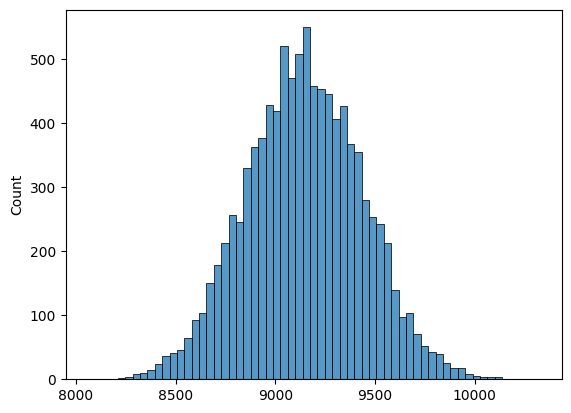

In [78]:
sns.histplot(x=bootstrapped_means_kids1)

In [79]:
bootstrapped_means_kids2=[]
for i in range(10000):
  rs_kids2=np.random.choice(kids,size=3000)
  rs_mean_kids2=int(np.mean(rs_kids2))
  bootstrapped_means_kids2.append(rs_mean_kids2)

<Axes: ylabel='Count'>

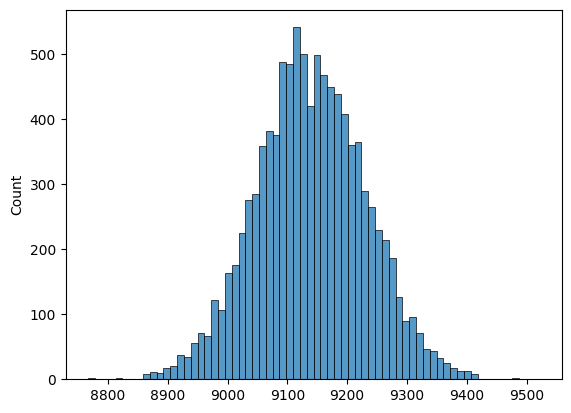

In [80]:
sns.histplot(x=bootstrapped_means_kids2)

In [81]:
bootstrapped_means_kids3=[]
for i in range(10000):
  rs_kids3=np.random.choice(kids,size=30000)
  rs_mean_kids3=int(np.mean(rs_kids3))
  bootstrapped_means_kids3.append(rs_mean_kids3)

<Axes: ylabel='Count'>

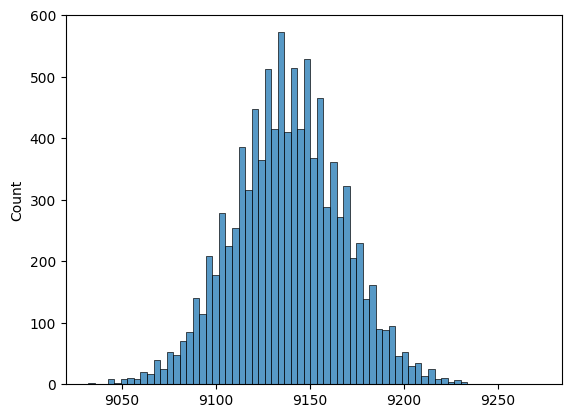

In [82]:
sns.histplot(x=bootstrapped_means_kids3)

In [83]:
# When we consider 95% CI, our left and right bracket will be 2.5 and 97.5
# for bootstrapped_mean
left_mean_kids1= np.percentile(bootstrapped_means_kids1,2.5)
right_mean_kids1= np.percentile(bootstrapped_means_kids1,97.5)
print('95% CI for bootstarpped_means_kids1 is', [left_mean_kids1,right_mean_kids1])

left_mean_kids2= np.percentile(bootstrapped_means_kids2,2.5)
right_mean_kids2= np.percentile(bootstrapped_means_kids2,97.5)
print('95% CI for bootstarpped_means_kids2 is', [left_mean_kids2,right_mean_kids2])

left_mean_kids3= np.percentile(bootstrapped_means_kids3,2.5)
right_mean_kids3= np.percentile(bootstrapped_means_kids3,97.5)
print('95% CI for bootstarpped_means_kids3 is', [left_mean_kids3,right_mean_kids3])

95% CI for bootstarpped_means_kids1 is [8577.975, 9712.0]
95% CI for bootstarpped_means_kids2 is [8957.0, 9319.0]
95% CI for bootstarpped_means_kids3 is [9081.0, 9195.0]


For customers between the age group of 0-25, we can see that, as we increase the sample size the CI range is narrowing as the standared error decreases. To be more precise, we can say that we have 95% of confidence that the mean purchase by age group 0-25 in the population data will be between [9081.0, 9194.0]

In [84]:
# Bootsrapping for re-sampling for adults

In [85]:
sample_adults1=np.random.choice(adults,size=300)
print("Mean of sample1", round(np.mean(sample_adults1),2))

sample_adults2=np.random.choice(adults,size=3000)
print("Mean of sample2", round(np.mean(sample_adults2),2))

sample_adults3=np.random.choice(adults,size=30000)
print("Mean of sample3", round(np.mean(sample_adults3),2))

Mean of sample1 9576.26
Mean of sample2 9003.06
Mean of sample3 9242.88


In [86]:
bootstrapped_means_adults1=[]
for i in range(10000):
  rs_adults=np.random.choice(adults,size=300)
  rs_mean_adults=int(np.mean(rs_adults))
  bootstrapped_means_adults1.append(rs_mean_adults)

<Axes: ylabel='Count'>

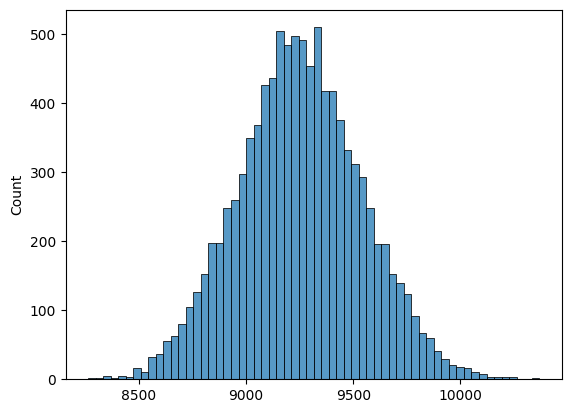

In [87]:
sns.histplot(x=bootstrapped_means_adults1)

<Axes: ylabel='Count'>

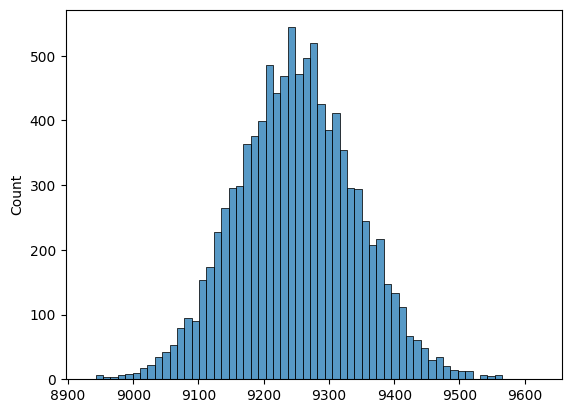

In [88]:
bootstrapped_means_adults2=[]
for i in range(10000):
  rs_adults2=np.random.choice(adults,size=3000)
  rs_mean_adults2=int(np.mean(rs_adults2))
  bootstrapped_means_adults2.append(rs_mean_adults2)

sns.histplot(x=bootstrapped_means_adults2)

<Axes: ylabel='Count'>

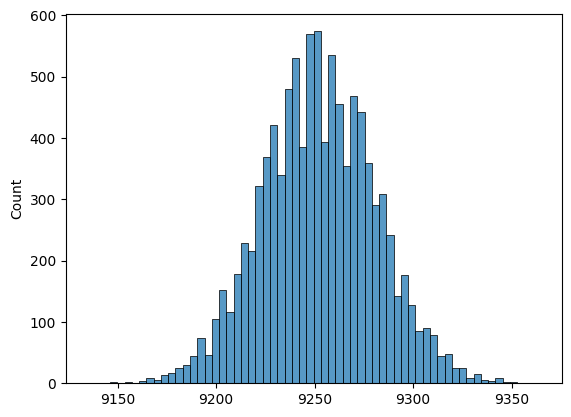

In [89]:
bootstrapped_means_adults3=[]
for i in range(10000):
  rs_adults3=np.random.choice(adults,size=30000)
  rs_mean_adults3=int(np.mean(rs_adults3))
  bootstrapped_means_adults3.append(rs_mean_adults3)
sns.histplot(x=bootstrapped_means_adults3)

In [90]:
# When we consider 95% CI, our left and right bracket will be 2.5 and 97.5
# for bootstrapped_mean
left_mean_adults1= np.percentile(bootstrapped_means_adults1,2.5)
right_mean_adults1= np.percentile(bootstrapped_means_adults1,97.5)
print('95% CI for bootstarpped_means_adults1 is', [left_mean_adults1,right_mean_adults1])

left_mean_adults2= np.percentile(bootstrapped_means_adults2,2.5)
right_mean_adults2= np.percentile(bootstrapped_means_adults2,97.5)
print('95% CI for bootstarpped_means_adults2 is', [left_mean_adults2,right_mean_adults2])

left_mean_adults3= np.percentile(bootstrapped_means_adults3,2.5)
right_mean_adults3= np.percentile(bootstrapped_means_adults3,97.5)
print('95% CI for bootstarpped_means_adults3 is', [left_mean_adults3,right_mean_adults3])

95% CI for bootstarpped_means_adults1 is [8690.975, 9821.0]
95% CI for bootstarpped_means_adults2 is [9073.0, 9430.0]
95% CI for bootstarpped_means_adults3 is [9196.0, 9309.0]


For customers between the age group of 26-50, we can see that, as we increase the sample size the CI range is narrowing as the standared error decreases. To be more precise, we can say that we have 95% of confidence that the mean purchase by age group 26-50 in the population data will be between [9195.0, 9309.0]

In [91]:
# Bootsrapping for re-sampling for seniors

In [92]:
sample_seniors1=np.random.choice(seniors,size=300)
print("Mean of sample1", round(np.mean(sample_seniors1),2))

sample_seniors2=np.random.choice(seniors,size=3000)
print("Mean of sample2", round(np.mean(sample_seniors2),2))

sample_seniors3=np.random.choice(seniors,size=30000)
print("Mean of sample3", round(np.mean(sample_seniors3),2))

Mean of sample1 9547.55
Mean of sample2 9544.69
Mean of sample3 9458.93


<Axes: ylabel='Count'>

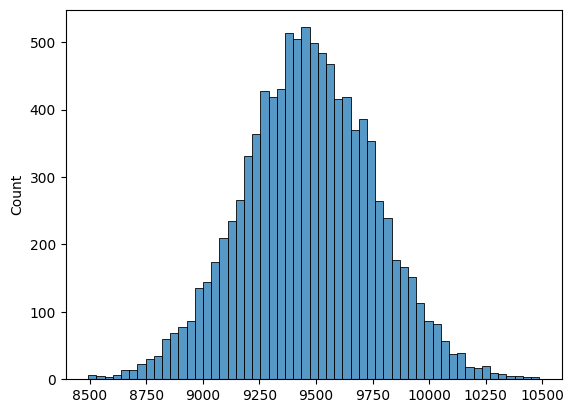

In [93]:
bootstrapped_means_seniors1=[]
for i in range(10000):
  rs_seniors=np.random.choice(seniors,size=300)
  rs_mean_seniors=int(np.mean(rs_seniors))
  bootstrapped_means_seniors1.append(rs_mean_seniors)

sns.histplot(x=bootstrapped_means_seniors1)

<Axes: ylabel='Count'>

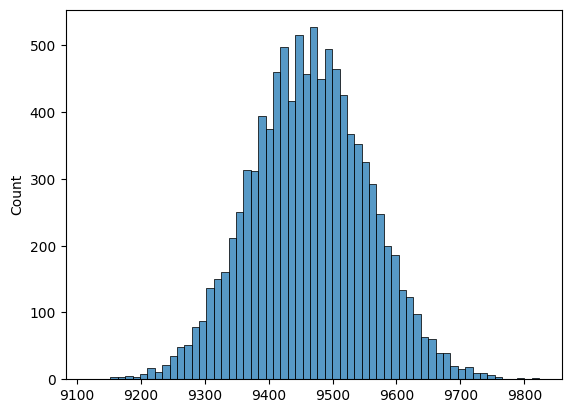

In [94]:
bootstrapped_means_seniors2=[]
for i in range(10000):
  rs_seniors2=np.random.choice(seniors,size=3000)
  rs_mean_seniors2=int(np.mean(rs_seniors2))
  bootstrapped_means_seniors2.append(rs_mean_seniors2)

sns.histplot(x=bootstrapped_means_seniors2)

<Axes: ylabel='Count'>

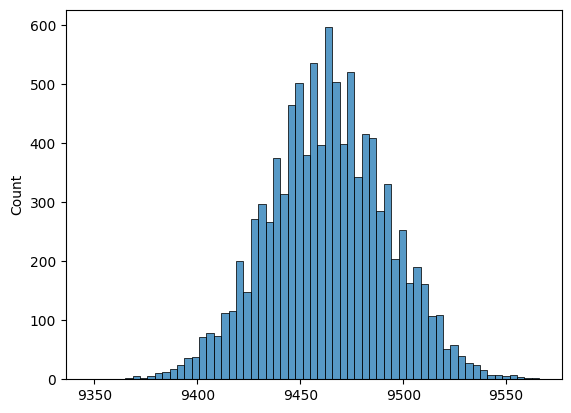

In [95]:
bootstrapped_means_seniors3=[]
for i in range(10000):
  rs_seniors3=np.random.choice(seniors,size=30000)
  rs_mean_seniors3=int(np.mean(rs_seniors3))
  bootstrapped_means_seniors3.append(rs_mean_seniors3)
sns.histplot(x=bootstrapped_means_seniors3)

In [96]:
# When we consider 95% CI, our left and right bracket will be 2.5 and 97.5
# for bootstrapped_mean
left_mean_seniors1= np.percentile(bootstrapped_means_seniors1,2.5)
right_mean_seniors1= np.percentile(bootstrapped_means_seniors1,97.5)
print('95% CI for bootstarpped_means_seniors1 is', [left_mean_seniors1,right_mean_seniors1])

left_mean_seniors2= np.percentile(bootstrapped_means_seniors2,2.5)
right_mean_seniors2= np.percentile(bootstrapped_means_seniors2,97.5)
print('95% CI for bootstarpped_means_seniors2 is', [left_mean_seniors2,right_mean_seniors2])

left_mean_seniors3= np.percentile(bootstrapped_means_seniors3,2.5)
right_mean_seniors3= np.percentile(bootstrapped_means_seniors3,97.5)
print('95% CI for bootstarpped_means_seniors3 is', [left_mean_seniors3,right_mean_seniors3])

95% CI for bootstarpped_means_seniors1 is [8882.95, 10036.0]
95% CI for bootstarpped_means_seniors2 is [9286.975, 9645.0]
95% CI for bootstarpped_means_seniors3 is [9406.0, 9520.0]


For customers between the age group of 51+, we can see that, as we increase the sample size the CI range is narrowing as the standared error decreases. To be more precise, we can say that we have 95% of confidence that the mean purchase by age group 51+ in the population data will be between [9405.0, 9521.0]

Insights & Recomendations:
*  From the above analysis, we have observed that the width of the confidence interval narrows as we increase the sample size. This happens beacuse as we increase the sample size, the standard error decreases.
*  The CI for overlaps as with different sample sizes. So the means of the actual population are likely to fall with in the same range.
*  With different sample sizes, the distribution chart changes. Although it is gaussian or bell shaped curve, it becomes narrower and standard error reduces.
*  For males, with 95% of confidence, the mean purchase by male in the population data will be between [9379.0, 9495.0]. For female customers, 95% of confidence fall between the range of [8680.0, 8789.0]
*  For single customers, 95% of confidence falls between the range of [9207.0, 9322.0] and for married customers [9204.0, 9317.0].
*  Customers bewtwwn the age group of 0-25 have their 95%  CI range between [9081.0, 9194.0]. For 26-50, the CI ranges from [9195.0, 9309.0] and lastly for 51+ customers, CI ranges between [9405.0, 9521.0].

*  On an average, males customers spend more than female customers. Walmart should plan special offers to attract female customers and for males, they they should focus onwhat kind of products the customer is interested in. Product category 1,2,5,8 are top buying product categories in both male and females. offer on that will be a good action.
*  Customers in the age group of 26-35 have made more purchases then others. Focusing more inthis age group will get the sales up. We can keep referal offers for them to increase the number of customers eventually increasing the sales.
*  When it comes to city category, number of purchases made by 'B' category city is more but city category 'C' has contributed to more purchase amount. We need to make strategies according to the goals of the marketing and sales team.
*  Accoring to the data, single customers have made more spends than the married customers. Hence, we should aggressively focus more on male customers, in the age group of 26-35 located in city category 'C'. For other customers, we need to strategically target them, understand their needs and then flash offers and dicsounts.



